<a href="https://colab.research.google.com/github/geetikabandlamudi/CS-GY-6923-ML/blob/ML_Lab1/MLFall22_Lab_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part 1:  Simple linear regression for one independent variable

In this lab, you will load data, plot data, perform simple mathematical manipulations, and fit a simple linear regression model.  Before doing this lab, you can go through the class demo on simple linear regression for an automobile dataset.  This lab uses the Boston housing data set, a widely-used machine learning data set for illustrating basic concepts.  

## Loading the data

The Boston housing data set was collected in the 1970s to study the relationship between house price and various factors such as the house size, crime rate, socio-economic status, etc.  Since the variables are easy to understand, the data set is ideal for learning basic concepts in machine learning.  The raw data and a complete description of the dataset can be found on the UCI website:

https://archive.ics.uci.edu/ml/machine-learning-databases/housing/

Each row in the dataset it not a single house -- it corresponds to the average information about homes in a single single [census track](https://en.wikipedia.org/wiki/Census_tract).

In the lab, you will complete all the code marked `TODO`. 

First, complete the following code that uses the `pd.read_csv` command to read the data from the file located at

https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data

I have supplied a list `names` of the column headers.  You will have to set the options in the `read_csv` command to correctly delimit the data in the file and name the columns correctly.

In [1]:
import pandas as pd
import numpy as np
colnames =[
    'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 
    'AGE',  'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'PRICE'
]

df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data", 
                 header=None,
                 delim_whitespace=True, 
                 names=colnames)

Display the first six rows of the data frame

In [ ]:
df.head(6)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7


## Basic Manipulations on the Data

What is the shape of the data?  How many attributes are there?  How many samples?
Print a statement of the form:

    num samples=xxx, num attributes=yy

In [2]:
print(f"num samples={df.shape[0]}, num attributes={df.shape[1]}")

num samples=506, num attributes=14


Create a response vector `y` with the values in the column `PRICE`.  The vector `y` should be a 1D `numpy.ndarray` structure.

In [3]:
y = df["PRICE"].values

Use the response vector `y` to find the mean house price in thousands and the fraction of homes that are above $40k. (You may realize this is very cheap.  Prices have gone up a lot since the 1970s!). Print and label your results. Create print statements of the form: 

`The mean house price is xx.yy thousands of dollars.`

`Only x.y percent are above $40k`


In [5]:
print(f"Mean house price = {y.mean()}")
fraction_price_above_40 = len(df[df["PRICE"].gt(40)])/len(y) 
print(f"Fraction of homes that are above $40k = {fraction_price_above_40}")


Mean house price = 22.532806324110677
Fraction of homes that are above $40k = 0.06126482213438735


## Visualizing the Data

Load the `matplotlib` package with the following commands.

In [6]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

Similar to the `y` vector, create a predictor vector `x` containing the values in the `RM` column, which represents the average number of rooms in each census track.

In [8]:
x = df["RM"].values

Create a scatter plot of the price vs. the `RM` attribute.  Label the axes with reasonable labels so that someone else can understand the plot.

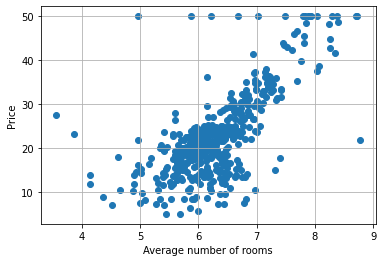

In [9]:
plt.scatter(x,y)
plt.xlabel("Average number of rooms")
plt.ylabel("Price")
plt.grid()

## Fitting a Simple Linear Model

We will write a simple function to perform a linear fit under the squared loss function. Use the formulae given in the class to compute the optimal parameters $\beta_0,\beta_1$ in the linear model $$y =\beta_0 + \beta_1 x$$ as well as the optimal loss $\sum_{i=1}^n (y_i - \beta_0 - \beta_1 x)^2$.

In [10]:
def fit_linear(x,y):
    """
    Given vectors of data points (x,y), performs a fit for the linear model:
       y = beta0 + beta1*x, 
    The function returns beta0, beta1, and loss, where loss is the sum-of-squares loss of.
    """

    xm = np.mean(x)
    ym = np.mean(y)
    syy = np.mean((y-ym)**2)
    syx = np.mean((y-ym)*(x-xm))
    sxx = np.mean((x-xm)**2)
    beta1 = syx/sxx
    beta0 = ym-(beta1*xm)
    
    yp = beta0 + (beta1*x)
    loss = np.sum((y-yp)**2)
    return beta0, beta1, loss


Using the function `fit_linear` above, print the values `beta0`, `beta1` and `loss` for the linear model of price vs. number of rooms.

In [11]:
b0,b1,l = fit_linear(x,y)
print(f"beta0={b0}")
print(f"beta1={b1}")
print(f"loss={l}")

beta0=-34.67062077643857
beta1=9.10210898118031
loss=22061.879196211798


Replot the scatter plot above, but now with the regression line.  You can create the regression line by creating points `yp` that are the predicted values for each value in `x`, according to our linear model. Plot as a line, not a scatter plot.

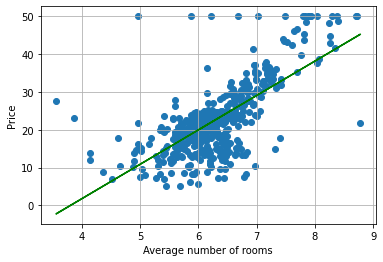

In [12]:
yp = b0+(b1*x)

plt.scatter(x,y)
plt.plot(x,yp,"-", color='green')
plt.xlabel("Average number of rooms")
plt.ylabel("Price")
plt.grid()

# Part 2:  Compare different dependent variables


We next compute the squared loss for all the predictors and output the values in a table. Your table should look like the following, where each entry in the first column is the attribute name and the second column is the squared loss.

    CRIM        XXXXX
    ZN          XXXXX
    INDUS       XXXXX
    ...         ...

You will need to write a loop. One option is to loop over the list of colunm names in the dataframe `df`.

What variable does the best job predicting house price?

In [19]:
minimum_loss = float("inf")
minimum_element = None
for each_column in df.columns.tolist():
  if each_column != "PRICE":
    b0,b1,loss = fit_linear(df[each_column],y)
    print(f"{each_column}\t{loss}")
    if loss < minimum_loss:
      minimum_loss = loss
      minimum_element = each_column
    

print(f"\nBest predictor variable is {minimum_element} with a loss of {minimum_loss}")

print("Most predictive variable for house price represents the variable " \
      "that has the least loss and the closest to the actual prediction and hence contributes the most towards the prediction result.")

CRIM	36275.512356275096
ZN	37166.55822394633
INDUS	32721.108150384098
CHAS	41404.21614437368
NOX	34916.16990783579
RM	22061.879196211798
AGE	36646.53435007064
DIS	40048.04884255197
RAD	36495.15481166092
TAX	33338.96132044059
PTRATIO	31702.01320696725
B	37966.409179004666
LSTAT	19472.38141832644

Best predictor variable is LSTAT with a loss of 19472.38141832644
Most predictive variable for house price represents the variable that has the least loss and the closest to the actual prediction and hence contributes the most towards the prediction result.


**TODO:** Describe in words the meaning of the most predictive variable for housing price. You might need to do some Googling to figure out what it means. 

# Part 3:  Compare different loss functions

## A Brute force algorithm for squared loss

Your code in `fit_linear` relies on the closed form expressions for the optimal $\beta_0$ and $\beta_1$, which we derived in class. However, if you did not know these formulas, you could have approximately minimized the loss function by brute force searching over a grid of possible values for $\beta_0$ and $\beta_1$. This idea was suggested by a student in our class. 

For example, we could try out all combinations of parameters where $\beta_0$ is in `np.arange(-50,50,1)` and $\beta_1$ is in `np.arange(-10,10,.1)`

Write a function which takes this approach to find a $\beta_0$ and $\beta_1$ which approximately minimize the squared loss: $\sum_{i=1}^n (y_i - \beta_0 - \beta_1 x)^2$

Approximate Fit:
b0 = 34, b1 = -0.9000000000000323, loss = 19540.082422999883

Result of linear fit:
b0 = 34.5538408793831, b1 = -0.9500493537579907, loss = 19472.38141832644



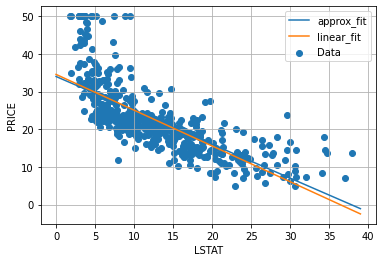

In [20]:
def fit_approx(x,y):
    """
    Given vectors of data points (x,y), performs an *approximate* fit for the linear model:
       y = beta0 + beta1*x, 
    under the sum-of-squares loss. The min_loss returned is the lost of the best beta0 and beta1 you found.
    """
    min_loss = float("inf")
    for b0 in np.arange(-50,50,1):
      for b1 in np.arange(-10,10,.1):
        yp = b0+(b1*x)
        loss = np.sum((y-yp)**2)
        if loss < min_loss:
          beta0, beta1, min_loss = b0, b1, loss
    return beta0, beta1, min_loss

lstat_prices = df["LSTAT"].values
lstat_range = np.arange(0,40)

# Plotting LSTAT data
plt.scatter(lstat_prices,y, label="Data")
plt.xlabel("LSTAT")
plt.ylabel("PRICE")

# Approx_fit
approx_fit_b0, approx_fit_b1, approx_fit_loss = fit_approx(lstat_prices,y)
approx_fit_yp = approx_fit_b0+(approx_fit_b1*lstat_range)
plt.plot(lstat_range, approx_fit_yp, "-", label="approx_fit")

print(f"Approximate Fit:")
print(f"b0 = {approx_fit_b0}, b1 = {approx_fit_b1}, loss = {approx_fit_loss}\n")

# Linear Fit
linear_fit_b0,linear_fit_b1,linear_fit_loss = fit_linear(lstat_prices,y)
linear_fit_yp = linear_fit_b0+(linear_fit_b1*lstat_range)
plt.plot(lstat_range, linear_fit_yp, "-", label="linear_fit")

print(f"Result of linear fit:")
print(f"b0 = {linear_fit_b0}, b1 = {linear_fit_b1}, loss = {linear_fit_loss}\n")

plt.grid()
plt.legend(loc="upper right")

Compare the output of `fit_approx` and `fit_linear` with `y` being `PRICE` and `x` being the `LSAT` variable from our dataset. You should do so:
* quantitatively, by printing the loss that each approach achieves
* and visually, by plotting the different fit lines obtained.

## Extending to different loss functions

One benefit of the above approach is that is easily extends to different loss funtions. Write functions which find an approximately optimal $\beta_0$ and $\beta_1$ for
* minimizing the $\ell_1$ (least absolute deviations) loss: $\sum_{i=1}^n |y_i - \beta_0 - \beta_1 x|$ 
* minimizing the $\ell_\infty$ (max) loss: $\max_i |y_i - \beta_0 - \beta_1 x|$


In [21]:
def fit_approx_l1(x,y):
    """
    Given vectors of data points (x,y), performs an *approximate* fit for the linear model:
       y = beta0 + beta1*x, 
    under the least absolute deviations loss.
    """
    min_loss = float("inf")
    for b0 in np.arange(-50,50,1):
      for b1 in np.arange(-10,10,.1):
        yp = b0+(b1*x)
        loss = np.sum(np.absolute(y - yp))
        if loss < min_loss:
          beta0, beta1, min_loss = b0, b1, loss
    
    return beta0, beta1, min_loss

In [22]:
def fit_approx_max(x,y):
    """
    Given vectors of data points (x,y), performs an *approximate* fit for the linear model:
       y = beta0 + beta1*x, 
    under the max loss.
    """
    min_loss = float("inf")
    for b0 in np.arange(-50,50,1):
      for b1 in np.arange(-10,10,.1):
        yp = b0+(b1*x)
        loss = np.max(np.absolute(y - yp))
        if loss < min_loss:
          beta0, beta1, min_loss = b0, b1, loss
    
    return beta0, beta1, min_loss

Use your algorithm to obtain 3 different linear fits for `PRICE` with predictor variable `LSTAT`, one for squared loss, one for $\ell_1$ loss, and one for $\ell_\infty$ loss. Plot the linear fits (along with the data scatter plot) on a single figure and use a legend to indicate which fit corresponds to which loss.

Approximate Fit:
 b0 = 34
 b1 = -0.9000000000000323
 loss = 19540.082422999883

ℓ1  Fit:
 b0 = 31
 b1 = -0.8000000000000327
 loss = 2163.5600000000027

ℓ∞ loss:
 b0 = 37
 b1 = -0.700000000000033
 loss = 19.671000000000316



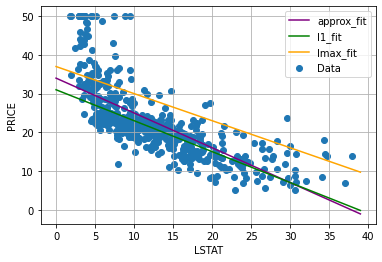

In [27]:
lstat_prices = df["LSTAT"].values


# Plotting LSTAT data
plt.scatter(lstat_prices, y, label="Data")
plt.xlabel("LSTAT")
plt.ylabel("PRICE")

# Approx_fit
approx_fit_b0, approx_fit_b1, approx_fit_loss = fit_approx(lstat_prices,y)
approx_fit_yp = approx_fit_b0+(approx_fit_b1*lstat_range)
plt.plot(lstat_range, approx_fit_yp, "-", label="approx_fit", color="purple")

print(f"Approximate Fit:")
print(f" b0 = {approx_fit_b0}\n b1 = {approx_fit_b1}\n loss = {approx_fit_loss}\n")

# ℓ1 loss
l1_b0,l1_b1,l1_loss = fit_approx_l1(lstat_prices,y)
l1_yp = l1_b0+(l1_b1*lstat_range)
plt.plot(lstat_range, l1_yp, "-", label="l1_fit", color="green")

print(f"ℓ1  Fit:")
print(f" b0 = {l1_b0}\n b1 = {l1_b1}\n loss = {l1_loss}\n")


# l max loss
lmax_b0,lmax_b1,lmax_loss = fit_approx_max(lstat_prices,y)
lmax_yp = lmax_b0+(lmax_b1*lstat_range)
plt.plot(lstat_range, lmax_yp, "-", label="lmax_fit", color="orange")

print(f"ℓ∞ loss:")
print(f" b0 = {lmax_b0}\n b1 = {lmax_b1}\n loss = {lmax_loss}\n")

plt.grid()
plt.legend(loc="upper right")